In [2]:
import pandas as pd

df = pd.read_csv('Customer-Churn-Records.csv')

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [4]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
cate_cols = df.select_dtypes(include=['object']).columns
print(cate_cols)
for col in cate_cols:
    print(f"=== {col} ===")
    print(df[col].value_counts())

Index(['Surname', 'Geography', 'Gender', 'Card Type'], dtype='object')
=== Surname ===
Surname
Smith        32
Scott        29
Martin       29
Walker       28
Brown        26
             ..
Hull          1
Sturdee       1
Flannagan     1
Dwyer         1
Corby         1
Name: count, Length: 2932, dtype: int64
=== Geography ===
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
=== Gender ===
Gender
Male      5457
Female    4543
Name: count, dtype: int64
=== Card Type ===
Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


In [7]:
df_clean = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [8]:
df_encoded = pd.get_dummies(df_clean, columns=['Geography', 'Gender', 'Card Type'],dtype=int)

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_France    10000 non-null  int64  
 13  Geography_Germany   10000 non-null  int64  
 14  Geography_Spain     10000 non-null  int64  
 15  Gender_Female       10000 non-null  int64  
 16  Gende

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['Exited','Complain'])
y = df_encoded['Exited']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8670
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.44      0.56       393

    accuracy                           0.87      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000

Confusion Matrix:
[[1562   45]
 [ 221  172]]


In [11]:
y_probs = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.3
y_pred_new = (y_probs > threshold).astype(int)

print(f"Accuracy: {accuracy_score(y_test, y_pred_new):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_new))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_new))

Accuracy: 0.8455
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1607
           1       0.60      0.66      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.76      2000
weighted avg       0.85      0.85      0.85      2000

Confusion Matrix:
[[1432  175]
 [ 134  259]]



=== 🔍 真實的流失主因 (Top 5) ===
           Feature  Importance
1              Age    0.219530
4    NumOfProducts    0.121265
3          Balance    0.105316
9     Point Earned    0.098338
7  EstimatedSalary    0.094808


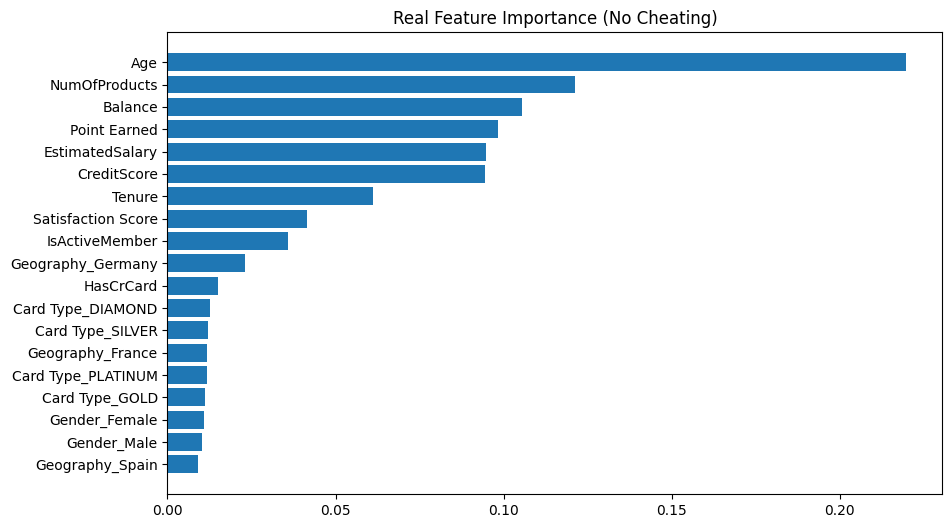

In [28]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance':importances
}).sort_values(by='Importance', ascending=False)

print("\n=== 🔍 真實的流失主因 (Top 5) ===")
print(feature_importance_df.head(5))

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:], feature_importance_df['Importance'][:])
plt.gca().invert_yaxis()
plt.title('Real Feature Importance (No Cheating)')
plt.show()


<Axes: >

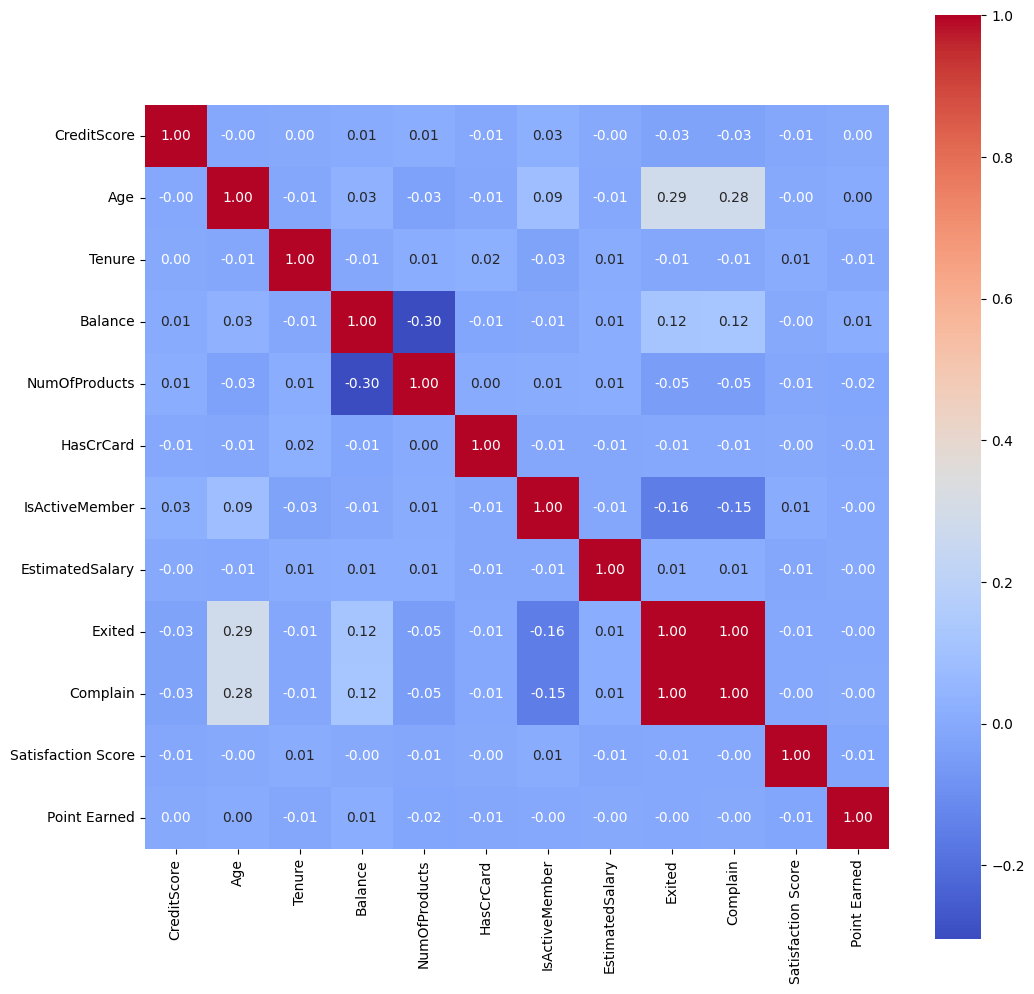

In [26]:
import seaborn as sns
df_clean
heatmap_df = df_clean.drop(columns=['Geography', 'Gender', 'Card Type'])
plt.figure(figsize=(12, 12))
matrix_df = heatmap_df.corr()
sns.heatmap(matrix_df, annot=True, cmap="coolwarm", fmt='.2f', square=True)
